In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
sns.set(palette='Set2')
plt.rc('font', family='serif')
plt.rc('text', usetex=True)

In [2]:
# General functions

def unit_vector(i, D):
    '''Returns (i+1)-th unit vector of dimension D'''
    
    out = np.zeros(D)
    out[i] = 1
    return out


def get_time(rates, Pk, Tk):
    '''Time step and index of reaction'''
    
    n = len(rates)
    dt = np.array([((Pk[i] - Tk[i])/rates[i]) if rates[i]>0.0 else np.inf for i in range(n)])
    idx = np.argmin(dt)
    return idx, dt[idx]

In [3]:
# Parameters
f = 1.2 # bite
alpha = 2. # between-host infection
beta = 0.05 # I_b to I_p
delta_b = 0.5 # death I_b
delta_p = 1. # death I_p
N = 1000 # population size
p = 0.05 # fraction susceptible to bite

# Initial condition
S_b_0 = int(N*p)
S_p_0 = N - S_b_0

D = 4 # number of variables in the system

In [4]:
# Problem-dependent functions

def transition_rates(x):
    '''Transition rates for every possible reaction'''
    return [f*x[0]/N, alpha*x[0]*x[3]/N**2, alpha*x[1]*x[3]/N**2, beta*x[2]/N, delta_b*x[2]/N, delta_p*x[3]/N]
            

# Stoichiometric vectors
# nu[i] corresponds to the i-th reaction
nu = np.array([unit_vector(2, D) - unit_vector(0, D), unit_vector(3, D) - unit_vector(0, D),
               unit_vector(3, D) - unit_vector(1, D), unit_vector(3, D) - unit_vector(2, D),
               -unit_vector(2, D), -unit_vector(3, D)],dtype=int)

# Solution
def plague(x):
    t = 0.0
    times = [t]
    x_t = [x]
    rates = transition_rates(x)
    n = len(rates)
    Pk = np.array([-np.log(np.random.random()) for _ in range(n)])
    Tk = np.zeros(n)
    while (x[0] + x[1]) > 0:
        reaction, time = get_time(rates, Pk, Tk)
        
        if time == np.inf:
            break
        
        t += time
        x = x + nu[reaction]
        x_t.append(x)
        times.append(t)
        Tk = np.array([Tk[k] + rates[k]*time for k in range(n)])
        Pk[reaction] -= np.log(np.random.random())
        rates = transition_rates(x)
        
    times = np.array(times)
    x_t = np.array(x_t)
    
    return times, x_t

In [5]:
x = [S_b_0, S_p_0, 0., 0.]
t, y = plague(x)

(array([ -50.,    0.,   50.,  100.,  150.,  200.]),
 <a list of 6 Text yticklabel objects>)

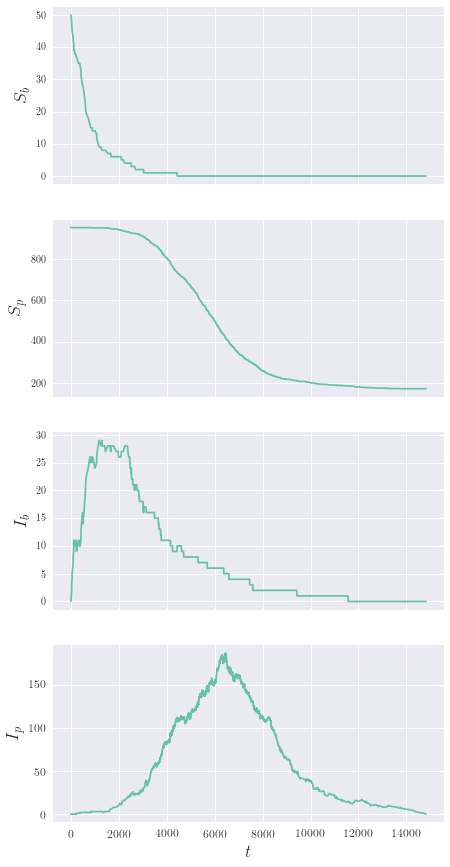

In [6]:
fig, axes = plt.subplots(4, figsize=(7,15), sharex=True)
labels = [r'$S_b$', r'$S_p$', r'$I_b$', r'$I_p$']
for i in range(len(axes)):
    axes[i].plot(t, y[:, i])
    axes[i].set_ylabel(labels[i], fontsize=18)
axes[3].set_xlabel(r'$t$', fontsize=18) # time units are 1/[units of the rates]
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)